# Analyzing and Predicting Wine Quality Using Python

In [5]:
import pandas as pd
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
# Display first few rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# TASK1

In [9]:
#Q1)Load dataset 
df = pd.read_csv(url, sep=";")
#Q2)Display the first five rows
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [11]:
#Q3)Check for missing values 
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
#datatypes
print(df.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [15]:
#Q4)Summary statistics
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# TASK2

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

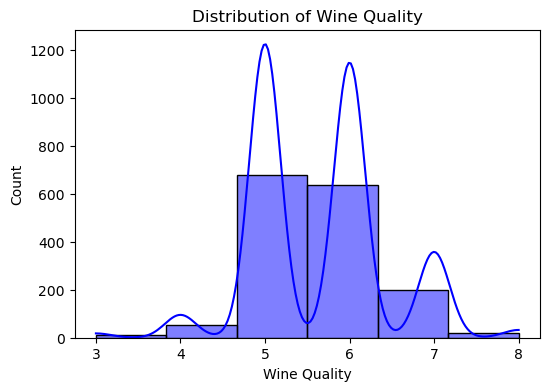

In [22]:
#Q1)Histogram of wine quality
plt.figure(figsize=(6,4))
sns.histplot(df['quality'], bins=6, kde=True, color='blue')
plt.title("Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()

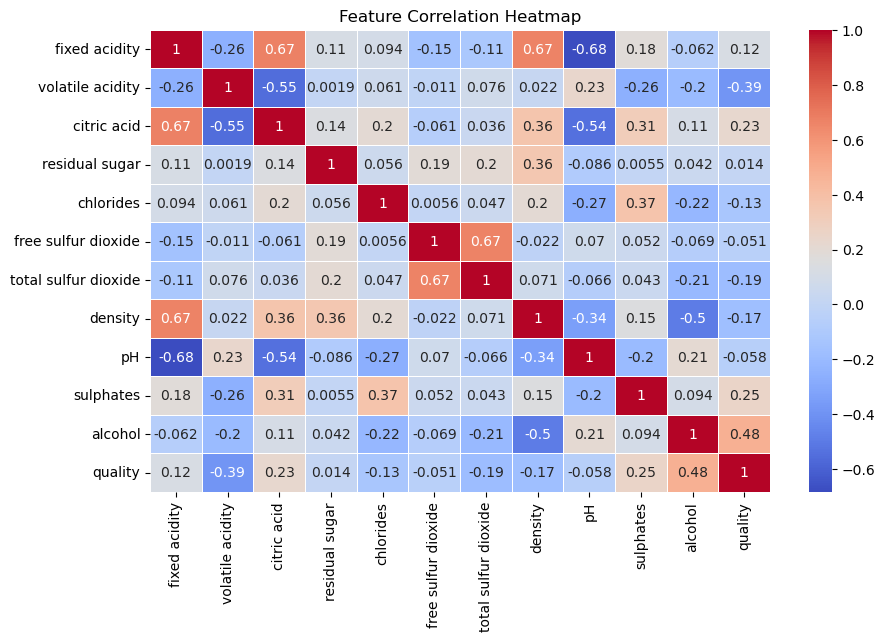

In [24]:
#Q2)Correlation Heat Map
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

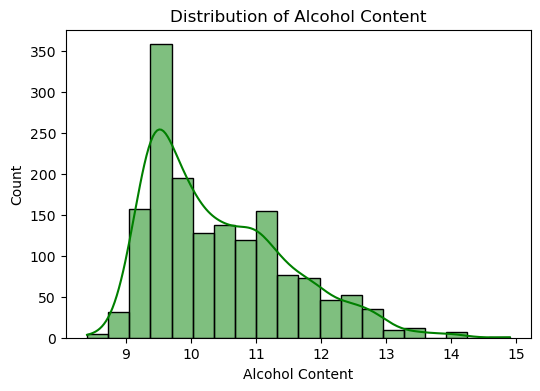

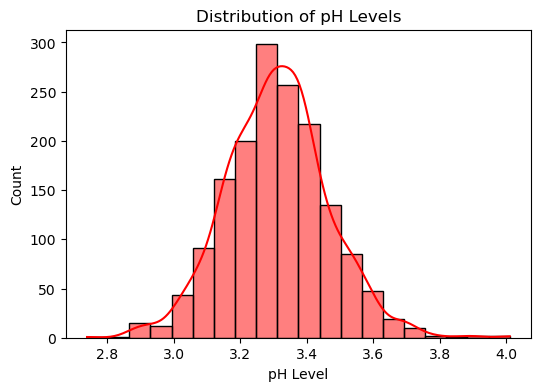

In [26]:
#Q3)Visualizing the distribution of alcohol and pH
# Distribution of Alcohol
plt.figure(figsize=(6,4))
sns.histplot(df['alcohol'], bins=20, kde=True, color='green')
plt.title("Distribution of Alcohol Content")
plt.xlabel("Alcohol Content")
plt.ylabel("Count")
plt.show()

# Distribution of pH
plt.figure(figsize=(6,4))
sns.histplot(df['pH'], bins=20, kde=True, color='red')
plt.title("Distribution of pH Levels")
plt.xlabel("pH Level")
plt.ylabel("Count")
plt.show()

# Task 3

In [31]:
#Q1)Convering wine quality into Binary classification
from sklearn.preprocessing import MinMaxScaler

# Convert quality into binary labels (Good: 1, Bad: 0)
df['quality'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Display first 5 rows to confirm the change
print(df[['quality']].head())

   quality
0        0
1        0
2        0
3        1
4        0


In [33]:
#Q2)Normalize Numerical Features Using MinMaxScaler

# Define features (X) and target variable (y)
X = df.drop("quality", axis=1)  # Features (all columns except quality)
y = df["quality"]  # Target variable (binary: 0 or 1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature values between 0 and 1
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display first 5 rows after scaling
print(X_scaled_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  


# TASK 4

In [36]:
#Q1)Split the data set into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shape of training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1279, 11) (1279,)
Testing set shape: (320, 11) (320,)


In [38]:
#Q2)Train a Logistic Regression model
# Initialize Logistic Regression model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

In [40]:
#Q3)Train a Random Forest Classifier model
# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

In [42]:
#Q4)Evaluate accuracy, precision, and recall
# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

# Evaluate Random Forest
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72       141
           1       0.80      0.72      0.75       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       141
           1       0.81      0.82      0.81       179

    accuracy                           0.79       320
   macro avg       0.78      0.78      0.78       320
weighted avg       0.79      0.79      0.79       320



# BONUS TASK

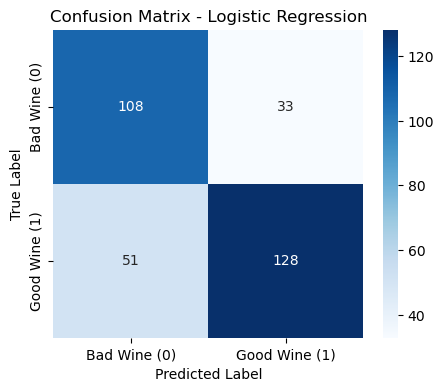

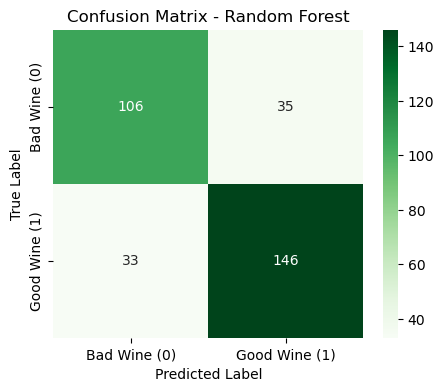

In [45]:
#Q1)Plot confusion matrices for both models
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad Wine (0)", "Good Wine (1)"], yticklabels=["Bad Wine (0)", "Good Wine (1)"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Bad Wine (0)", "Good Wine (1)"], yticklabels=["Bad Wine (0)", "Good Wine (1)"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
#Q2)Interpret False Positives (FP) and True Negatives (TN)
# Compute confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)  # Logistic Regression
cm_rf = confusion_matrix(y_test, y_pred_rf)  # Random Forest

# Extract values from confusion matrices
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()  # Logistic Regression
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()  # Random Forest

# Print the interpretation for Logistic Regression
print("Logistic Regression Interpretation:")
print(f"True Negatives (TN): {tn_lr}")
print(f"False Positives (FP): {fp_lr}")
print(f"False Negatives (FN): {fn_lr}")
print(f"True Positives (TP): {tp_lr}")

# Print the interpretation for Random Forest
print("\nRandom Forest Interpretation:")
print(f"True Negatives (TN): {tn_rf}")
print(f"False Positives (FP): {fp_rf}")
print(f"False Negatives (FN): {fn_rf}")
print(f"True Positives (TP): {tp_rf}")



Logistic Regression Interpretation:
True Negatives (TN): 108
False Positives (FP): 33
False Negatives (FN): 51
True Positives (TP): 128

Random Forest Interpretation:
True Negatives (TN): 106
False Positives (FP): 35
False Negatives (FN): 33
True Positives (TP): 146


In [49]:
#Conclusion
#The Random Forest model performed better than Logistic Regression, with higher accuracy and lower false positives.
#A lower False Positive rate is important because misclassifying bad wine as good can lead to incorrect quality predictions.
#Next steps include **hyperparameter tuning** (adjusting Random Forest settings) to improve model accuracy.
